<a href="https://colab.research.google.com/github/tdm09/assignment01-sebastianrdz/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic
## Descripcion
Reto de Titanic

## Coneccion Google Dirve & Redirecionamiento de Directorio

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Reto Titanic" 
!ls

/content/gdrive/MyDrive/Colab Notebooks/Reto Titanic
'Copia de Concentración : CRISP-DM y Temas (jueves 9 y jueves 25 de agosto 2022).gslides'
 gender_submission.csv
 submission.csv
 test.csv
 Titanic.ipynb
'Titanic(Prueba).ipynb'
 train.csv


## Librerias

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [ ]:
import seaborn as sns


## Train


### General

In [ ]:
# Cambiar el path de donde se encuentran los datos
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Cambiar variables para usarlas
df_train.Sex = df_train.Sex.astype('category').cat.codes
# df_train.Embarked = df_train.Embarked.astype('category').cat.codes
df_train.Age.fillna(int(df_train.Age.mean()), inplace=True)
# df_train.Embarked.fillna(int(df_train.Embarked.mean()), inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int64(5), int8(2), object(3)
memory usage: 71.5+ KB


### Visualizacion de Datos (Train)

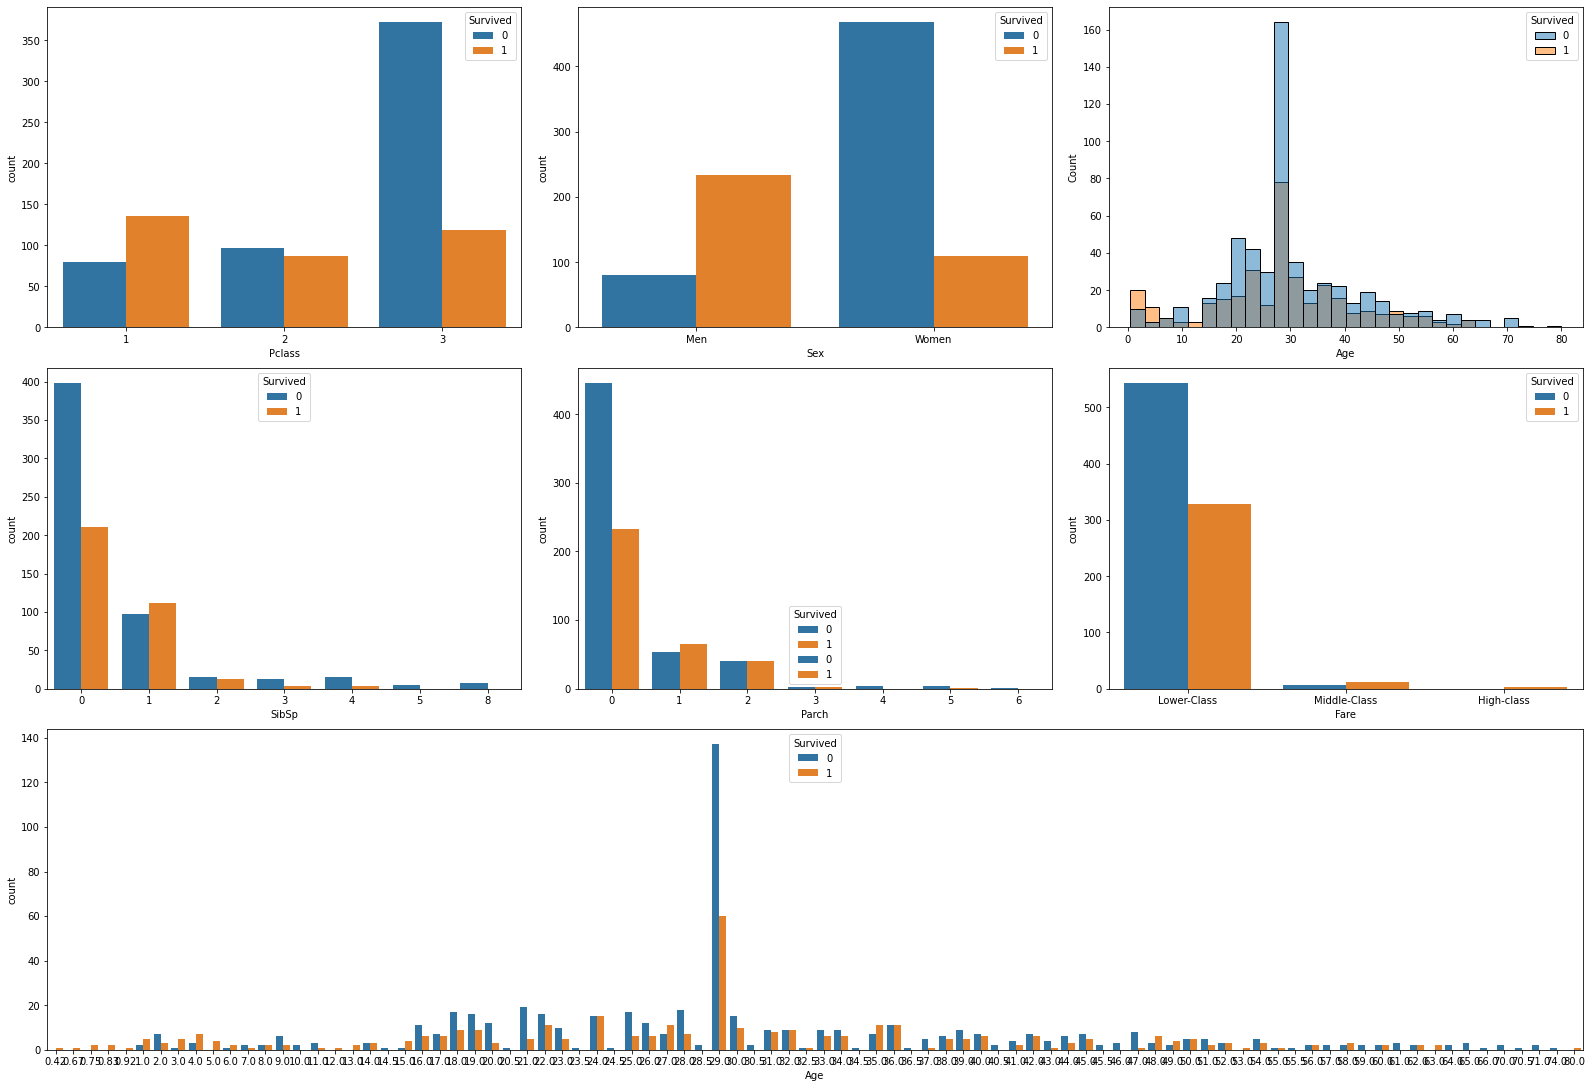

In [ ]:
# Generacion de grid para visualizacion de graficos
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=True, labelleft=True)
fig = plt.figure(constrained_layout=True, figsize=(22,15))
gs = GridSpec(6, 3, figure=fig)
ax1 = fig.add_subplot(gs[0:2, 0])
ax2 = fig.add_subplot(gs[0:2, 1])
ax3 = fig.add_subplot(gs[0:2, 2])
ax4 = fig.add_subplot(gs[2:4, 0])
ax5 = fig.add_subplot(gs[2:4, 1])
ax6 = fig.add_subplot(gs[2:4, 2])
ax7 = fig.add_subplot(gs[4:6, 0:3])


# Generacion de diferentes graficas de visualizacion

sns.countplot(ax=ax1, x='Pclass', hue='Survived', data=df_train)

titles = ['Men', 'Women']
sns.countplot(ax=ax2, x=pd.cut(df_train.Sex, 2, labels=titles), hue='Survived', data=df_train)

sns.histplot(ax=ax3 ,x='Age', hue='Survived', data=df_train)
sns.countplot(ax=ax4, x='SibSp', hue='Survived', data=df_train)
sns.countplot(ax=ax5, x='Parch', hue='Survived', data=df_train)

titles = ['Lower-Class', 'Middle-Class', 'High-class']
sns.countplot(ax=ax6, x=pd.cut(df_train.Fare, 3, labels=titles), hue='Survived', data=df_train)

sns.countplot(ax=ax5, x='Parch', hue='Survived', data=df_train)
sns.countplot(ax=ax7 ,x='Age', hue='Survived', data=df_train)



## Test

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
